In [4]:
# Required imports
import random
import matplotlib.pyplot as plt

n = 1:
  Estimated E[X] = 1.000
  Theoretical E[X] = 1.000
  Distribution: {1: 1.0}

n = 2:
  Estimated E[X] = 1.332
  Theoretical E[X] = 1.333
  Distribution: {1: 0.6684, 2: 0.3316}

n = 3:
  Estimated E[X] = 1.526
  Theoretical E[X] = 1.533
  Distribution: {1: 0.5398, 2: 0.3946, 3: 0.0656}

n = 4:
  Estimated E[X] = 1.673
  Theoretical E[X] = 1.676
  Distribution: {1: 0.4569, 2: 0.421, 3: 0.1138, 4: 0.0083}

n = 5:
  Estimated E[X] = 1.802
  Theoretical E[X] = 1.787
  Distribution: {1: 0.3909, 2: 0.438, 3: 0.1502, 4: 0.02, 5: 0.0009}

n = 6:
  Estimated E[X] = 1.882
  Theoretical E[X] = 1.878
  Distribution: {1: 0.369, 2: 0.4224, 3: 0.1691, 4: 0.0367, 5: 0.0027, 6: 0.0001}

n = 7:
  Estimated E[X] = 1.950
  Theoretical E[X] = 1.955
  Distribution: {1: 0.3454, 2: 0.414, 3: 0.191, 4: 0.0441, 5: 0.0053, 6: 0.0002}

n = 8:
  Estimated E[X] = 2.020
  Theoretical E[X] = 2.022
  Distribution: {1: 0.318, 2: 0.4175, 3: 0.2011, 4: 0.0538, 5: 0.0088, 6: 0.0008}

n = 9:
  Estimated E[X] = 2.074


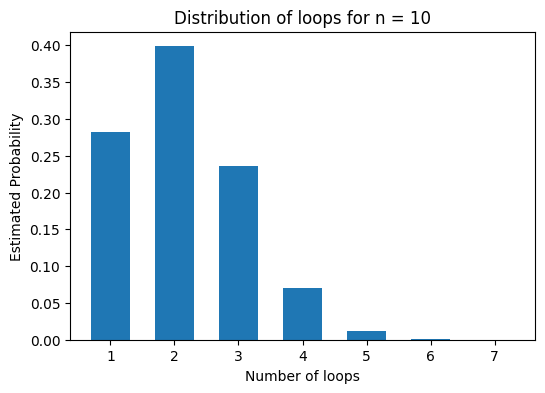

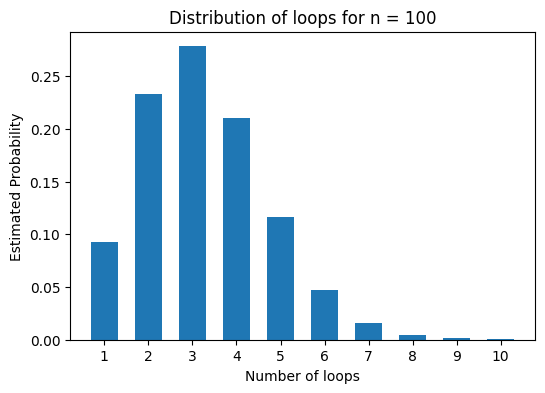

In [ ]:
# Initialise a bowl with n strings => 2n ends
def initialise_bowl(n):
    bowl = []

    # Dictionary storing the string corresponding to each end. i.e. {end: string} etc.
    strings_dict = {}

    # Add ends 1a, 1b, 2a, 2b etc. to the bowl. ia and ib correspond to two ends of the same string
    for i in range(n):
        end1 = f'{i}a'
        end2 = f'{i}b'
        bowl.append(end1)
        bowl.append(end2)

        # Set the string each ends corresponds.
        strings_dict[end1] = i
        strings_dict[end2] = i

    return bowl, strings_dict

# Simulate one trial and count how many loops form
def simulate_string_loops(n):
    # Create a bowl
    bowl, strings_dict = initialise_bowl(n)

    # Next free id - used when we need to create a new string corresponding to the longer joined string
    next_id = n

    # Number of closed loops
    loop_count = 0

    # Whilst bowl is non-empty
    while bowl:
        # Choose two ends at random
        end1, end2 = random.sample(bowl, 2)

        # Remove them
        bowl.remove(end1)
        bowl.remove(end2)

        # Grab the strings they correspond to
        str1 = strings_dict[end1]
        str2 = strings_dict[end2]

        if str1 == str2:
            # If they belong to the same string, we formed a closed loop
            loop_count += 1
        else:
            # If they are from different strings, we need to create a new string which represents their tying
            new_id = next_id
            next_id += 1
            
            # Reassign the other two ends to point to this longer string
            for end in strings_dict:
                if strings_dict[end] == str1 or strings_dict[end] == str2:
                    strings_dict[end] = new_id

    return loop_count

# Estimate distribution of loop counts over many trials
def estimate_distribution(n, trials=10000):
    # Dictionary to map loops to their frequencies
    dist = {}

    for _ in range(trials):
        loops = simulate_string_loops(n)
        dist[loops] = dist.get(loops, 0) + 1

    # Convert to probabilities
    for k in dist:
        dist[k] /= trials

    return dist

# Compute expectation from distribution
def expectation(dist):
    return sum(k * p for k, p in dist.items())

# Plot histogram of loop frequencies
def plot_histogram(n):
    dist = estimate_distribution(n)
    x_vals = sorted(dist.keys())
    y_vals = [dist[k] for k in x_vals]
    plt.figure(figsize=(6, 4))
    plt.bar(x_vals, y_vals, width=0.6)
    plt.title(f'Distribution of loops for n = {n}')
    plt.xlabel('Number of loops')
    plt.ylabel('Estimated Probability')
    plt.xticks(range(min(x_vals), max(x_vals) + 1))
    plt.show()

# Run for n in range 1 to 10
for n in range(1, 11):
    dist = estimate_distribution(n)
    estimated_exp = expectation(dist)
    theoretical = sum(1 / (2 * k - 1) for k in range(1, n + 1))

    # Format and print results
    print(f'n = {n}:')
    print(f'  Estimated E[X] = {estimated_exp:.3f}')
    print(f'  Theoretical E[X] = {theoretical:.3f}')
    print(f'  Distribution: {dict(sorted(dist.items()))}')
    print()

plot_histogram(10)
plot_histogram(100)

Estimated expected loop length for n = 10: 4.669


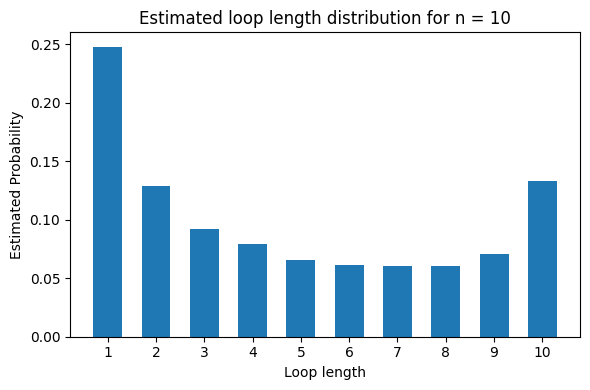

Estimated expected loop length for n = 100: 30.425


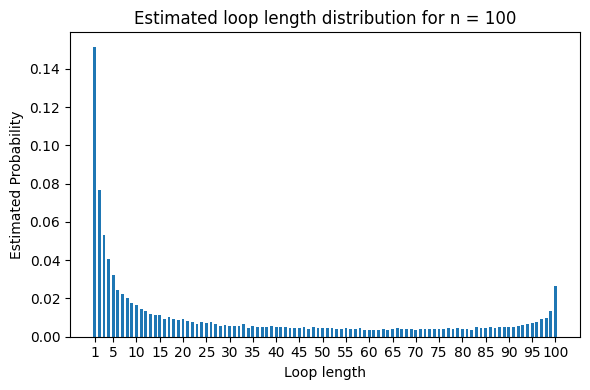

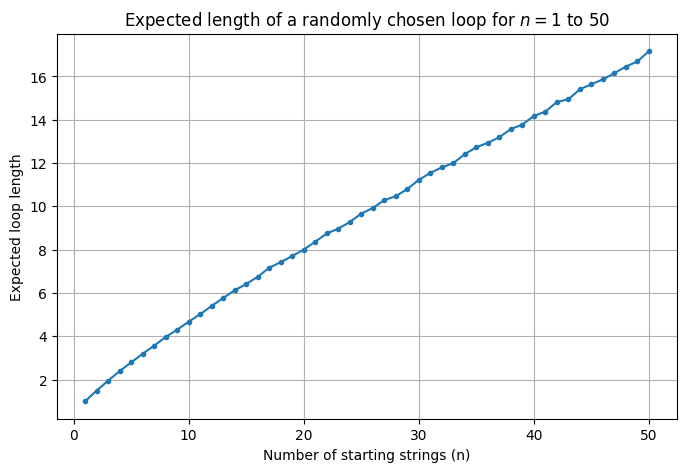

In [ ]:
# Extension: consider loop lengths rather than count

# Simulate one trial and return list of loop lengths
def simulate_lengths(n):
    bowl, strings_dict = initialise_bowl(n)
    next_id = n
    loop_lengths = []

    # Store lengths for strings
    string_lengths = {i: 1 for i in range(n)}

    while bowl:
        end1, end2 = random.sample(bowl, 2)
        bowl.remove(end1)
        bowl.remove(end2)

        str1 = strings_dict[end1]
        str2 = strings_dict[end2]

        if str1 == str2:
            # Loop formed
            loop_lengths.append(string_lengths[str1])
        else:
            # Merge two strings
            new_id = next_id
            next_id += 1

            # New string has length equal to lengths of strings that made it up
            new_length = string_lengths[str1] + string_lengths[str2]
            string_lengths[new_id] = new_length

            for end in strings_dict:
                if strings_dict[end] == str1 or strings_dict[end] == str2:
                    strings_dict[end] = new_id

    return loop_lengths

# Estimate loop length distribution for many trials
def estimate_length_distribution(n, trials=10000):
    length_freqs = {}

    for _ in range(trials):
        lengths = simulate_lengths(n)
        for l in lengths:
            length_freqs[l] = length_freqs.get(l, 0) + 1

    total_loops = sum(length_freqs.values())
    dist = {k: v / total_loops for k, v in length_freqs.items()}
    return dist

# Plot histogram of loop lengths
def plot_length_histogram(n, trials=10000):
    dist = estimate_length_distribution(n, trials)
    print(f'Estimated expected loop length for n = {n}: {expectation(dist):.3f}')
    x_vals = sorted(dist.keys())
    y_vals = [dist[k] for k in x_vals]
    plt.figure(figsize=(6, 4))
    plt.bar(x_vals, y_vals, width=0.6)
    plt.title(f'Estimated loop length distribution for n = {n}')
    plt.xlabel('Loop length')
    plt.ylabel('Estimated Probability')
    if n <= 30:
        plt.xticks(range(min(x_vals), max(x_vals) + 1))
    else:
        plt.xticks([x for x in range(min(x_vals), max(x_vals) + 1) if x % 5 == 0 or x == 1 or x == n])
    plt.tight_layout()
    plt.show()

# Plot expected loop length for n = 1 to n_max
def plot_expected_length(n_max, trials=10000):
    n_values = list(range(1, n_max + 1))
    expected_lengths = []

    for n in n_values:
        dist = estimate_length_distribution(n, trials)
        expected = expectation(dist)
        expected_lengths.append(expected)

    plt.figure(figsize=(8, 5))
    plt.plot(n_values, expected_lengths, marker='o', markersize=3)
    plt.title(f'Expected length of a randomly chosen loop for $n = 1$ to ${n}$')
    plt.xlabel('Number of starting strings (n)')
    plt.ylabel('Expected loop length')
    plt.grid(True)
    plt.show()

plot_length_histogram(10)
plot_length_histogram(100)
plot_expected_length(50)